In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


In [45]:
df = pd.read_csv('climate_change_data.csv')

In [46]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [47]:
df = df.drop(columns=['Date', 'Location', 'Country'])

In [48]:
df.head()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [49]:
def convert_to_f(input):
    return (input * 9/5) + 32

df['Temperature'] = df['Temperature'].apply(convert_to_f)

In [50]:
def convert_to_decimal(input):
    return input / 100

df['Humidity'] = df['Humidity'].apply(convert_to_decimal)

In [51]:
print(f'Median: {df["Temperature"].median()}')
print(f'Mean: {df["Temperature"].mean()}')
print(f'Standard Deviation: {df["Temperature"].std()}')

Median: 58.96604433552025
Mean: 58.88486080153422
Standard Deviation: 9.055108528560286


In [52]:
# The distribution of temperatures is fairly normal.
print(f'Percent of values 1 standard deviation above the mean: {df[df["Temperature"] > df["Temperature"].mean()][df["Temperature"] <= (df["Temperature"].mean() + df["Temperature"].std())].shape[0] / df.shape[0] * 100}%')
print(f'Percent of values 1 standard deviation below the mean: {df[df["Temperature"] < df["Temperature"].mean()][df["Temperature"] >= (df["Temperature"].mean() - df["Temperature"].std())].shape[0] / df.shape[0] * 100}%')

Percent of values 1 standard deviation above the mean: 34.37%
Percent of values 1 standard deviation below the mean: 33.83%


/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/1081316318.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation above the mean: {df[df["Temperature"] > df["Temperature"].mean()][df["Temperature"] <= (df["Temperature"].mean() + df["Temperature"].std())].shape[0] / df.shape[0] * 100}%')
/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/1081316318.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation below the mean: {df[df["Temperature"] < df["Temperature"].mean()][df["Temperature"] >= (df["Temperature"].mean() - df["Temperature"].std())].shape[0] / df.shape[0] * 100}%')


In [53]:
print(f'Median: {df["CO2 Emissions"].median()}')
print(f'Mean: {df["CO2 Emissions"].mean()}')
print(f'Standard Deviation: {df["CO2 Emissions"].std()}')

Median: 400.82132446979676
Mean: 400.2204688976375
Standard Deviation: 49.69693270661679


In [54]:
# The distribution of CO2 emissions is fairly normal.
print(f'Percent of values 1 standard deviation above the mean: {df[df["CO2 Emissions"] > df["CO2 Emissions"].mean()][df["CO2 Emissions"] <= (df["CO2 Emissions"].mean() + df["CO2 Emissions"].std())].shape[0] / df.shape[0] * 100}%')
print(f'Percent of values 1 standard deviation below the mean: {df[df["CO2 Emissions"] < df["CO2 Emissions"].mean()][df["CO2 Emissions"] >= (df["CO2 Emissions"].mean() - df["CO2 Emissions"].std())].shape[0] / df.shape[0] * 100}%')

Percent of values 1 standard deviation above the mean: 34.97%
Percent of values 1 standard deviation below the mean: 33.53%


/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/929974172.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation above the mean: {df[df["CO2 Emissions"] > df["CO2 Emissions"].mean()][df["CO2 Emissions"] <= (df["CO2 Emissions"].mean() + df["CO2 Emissions"].std())].shape[0] / df.shape[0] * 100}%')
/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/929974172.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation below the mean: {df[df["CO2 Emissions"] < df["CO2 Emissions"].mean()][df["CO2 Emissions"] >= (df["CO2 Emissions"].mean() - df["CO2 Emissions"].std())].shape[0] / df.shape[0] * 100}%')


In [55]:
print(f'Median: {df["Sea Level Rise"].median()}')
print(f'Mean: {df["Sea Level Rise"].mean()}')
print(f'Standard Deviation: {df["Sea Level Rise"].std()}')

Median: 0.00233213304753395
Mean: -0.0031516854837459044
Standard Deviation: 0.9913486683740719


In [56]:
# The distribution of sea level rise is fairly normal.
print(f'Percent of values 1 standard deviation above the mean: {df[df["Sea Level Rise"] > df["Sea Level Rise"].mean()][df["Sea Level Rise"] <= (df["Sea Level Rise"].mean() + df["Sea Level Rise"].std())].shape[0] / df.shape[0] * 100}%')
print(f'Percent of values 1 standard deviation below the mean: {df[df["Sea Level Rise"] < df["Sea Level Rise"].mean()][df["Sea Level Rise"] >= (df["Sea Level Rise"].mean() - df["Sea Level Rise"].std())].shape[0] / df.shape[0] * 100}%')

Percent of values 1 standard deviation above the mean: 34.4%
Percent of values 1 standard deviation below the mean: 33.54%


/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/3982330090.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation above the mean: {df[df["Sea Level Rise"] > df["Sea Level Rise"].mean()][df["Sea Level Rise"] <= (df["Sea Level Rise"].mean() + df["Sea Level Rise"].std())].shape[0] / df.shape[0] * 100}%')
/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/3982330090.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation below the mean: {df[df["Sea Level Rise"] < df["Sea Level Rise"].mean()][df["Sea Level Rise"] >= (df["Sea Level Rise"].mean() - df["Sea Level Rise"].std())].shape[0] / df.shape[0] * 100}%')


In [57]:
print(f'Median: {df["Precipitation"].median()}')
print(f'Mean: {df["Precipitation"].mean()}')
print(f'Standard Deviation: {df["Precipitation"].std()}')

Median: 49.818967107350566
Mean: 49.88120758239156
Standard Deviation: 28.86241708886994


In [58]:
# The distribution of precipitation is somewhat normal, but not quite.
print(f'Percent of values 1 standard deviation above the mean: {df[df["Precipitation"] > df["Precipitation"].mean()][df["Precipitation"] <= (df["Precipitation"].mean() + df["Precipitation"].std())].shape[0] / df.shape[0] * 100}%')
print(f'Percent of values 1 standard deviation below the mean: {df[df["Precipitation"] < df["Precipitation"].mean()][df["Precipitation"] >= (df["Precipitation"].mean() - df["Precipitation"].std())].shape[0] / df.shape[0] * 100}%')

Percent of values 1 standard deviation above the mean: 29.15%
Percent of values 1 standard deviation below the mean: 28.57%


/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/571570434.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation above the mean: {df[df["Precipitation"] > df["Precipitation"].mean()][df["Precipitation"] <= (df["Precipitation"].mean() + df["Precipitation"].std())].shape[0] / df.shape[0] * 100}%')
/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/571570434.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation below the mean: {df[df["Precipitation"] < df["Precipitation"].mean()][df["Precipitation"] >= (df["Precipitation"].mean() - df["Precipitation"].std())].shape[0] / df.shape[0] * 100}%')


<Axes: >

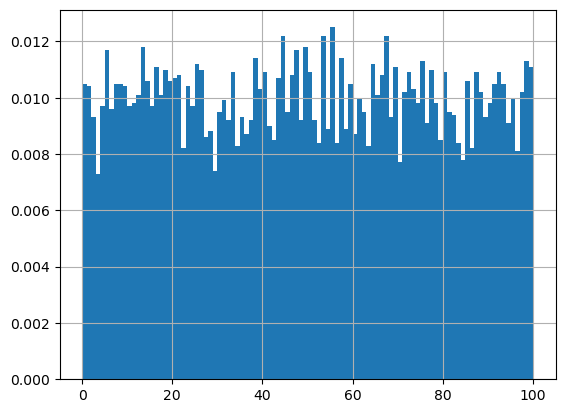

In [68]:
# Precipitation is not normally distributed, but it is not skewed.
df['Precipitation'].hist(density=True, bins=100)

In [69]:
print(f'Median: {df["Humidity"].median()}')
print(f'Mean: {df["Humidity"].mean()}')
print(f'Standard Deviation: {df["Humidity"].std()}')

Median: 0.49678412453807946
Mean: 0.49771301928591655
Standard Deviation: 0.289293200272605


In [70]:
# The distribution of temperatures is somewhat normal, but not quite.
print(f'Percent of values 1 standard deviation above the mean: {df[df["Humidity"] > df["Humidity"].mean()][df["Humidity"] <= (df["Humidity"].mean() + df["Humidity"].std())].shape[0] / df.shape[0] * 100}%')
print(f'Percent of values 1 standard deviation below the mean: {df[df["Humidity"] < df["Humidity"].mean()][df["Humidity"] >= (df["Humidity"].mean() - df["Humidity"].std())].shape[0] / df.shape[0] * 100}%')

Percent of values 1 standard deviation above the mean: 28.57%
Percent of values 1 standard deviation below the mean: 28.76%


/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/2937818012.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation above the mean: {df[df["Humidity"] > df["Humidity"].mean()][df["Humidity"] <= (df["Humidity"].mean() + df["Humidity"].std())].shape[0] / df.shape[0] * 100}%')
/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/2937818012.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation below the mean: {df[df["Humidity"] < df["Humidity"].mean()][df["Humidity"] >= (df["Humidity"].mean() - df["Humidity"].std())].shape[0] / df.shape[0] * 100}%')


<Axes: >

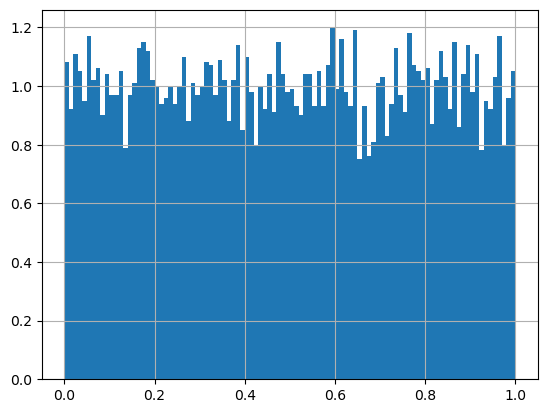

In [71]:
# Humidity is not normally distributed, but it is not skewed.
df['Humidity'].hist(density=True, bins=100)

In [72]:
print(f'Median: {df["Wind Speed"].median()}')
print(f'Mean: {df["Wind Speed"].mean()}')
print(f'Standard Deviation: {df["Wind Speed"].std()}')

Median: 24.910787458770095
Mean: 25.082065534372457
Standard Deviation: 14.466648038545445


In [73]:
# The distribution of sea level rise is fairly normal.
print(f'Percent of values 1 standard deviation above the mean: {df[df["Wind Speed"] > df["Wind Speed"].mean()][df["Wind Speed"] <= (df["Wind Speed"].mean() + df["Wind Speed"].std())].shape[0] / df.shape[0] * 100}%')
print(f'Percent of values 1 standard deviation below the mean: {df[df["Wind Speed"] < df["Wind Speed"].mean()][df["Wind Speed"] >= (df["Wind Speed"].mean() - df["Wind Speed"].std())].shape[0] / df.shape[0] * 100}%')

Percent of values 1 standard deviation above the mean: 28.249999999999996%
Percent of values 1 standard deviation below the mean: 29.270000000000003%


/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/166109512.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation above the mean: {df[df["Wind Speed"] > df["Wind Speed"].mean()][df["Wind Speed"] <= (df["Wind Speed"].mean() + df["Wind Speed"].std())].shape[0] / df.shape[0] * 100}%')
/var/folders/ky/73d3z09d6f595ffjdrf1_lxw0000gn/T/ipykernel_2671/166109512.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Percent of values 1 standard deviation below the mean: {df[df["Wind Speed"] < df["Wind Speed"].mean()][df["Wind Speed"] >= (df["Wind Speed"].mean() - df["Wind Speed"].std())].shape[0] / df.shape[0] * 100}%')


In [75]:
X = df.drop(["Temperature"], axis=1)
y = df["Temperature"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [86]:
columns_to_scale = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), columns_to_scale)
    ]
)

In [87]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred_lin_reg = lin_reg.predict(X_test)

In [91]:
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
rmse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg, squared=False)

print(f'Mean Squared Error: {mse_lin_reg}')
print(f'R-Squared (R2): {r2_lin_reg}')
print(f'Mean Absolute Error: {mae_lin_reg}')
print(f'Root Mean Squared Error: {rmse_lin_reg}')

Mean Squared Error: 85.19121513056089
R-Squared (R2): -0.0008899762017027246
Mean Absolute Error: 7.431704379862189
Root Mean Squared Error: 9.229908728181492
